------------------------
#### Bessel's correction
----------------------

- Create a large population of 100,000 random numbers.
- Draw a sample of 25 values from this population.
- Compute the population variance.
- Compute the sample variance using both n and n−1 as denominators.
- Compare the results.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Seed for reproducibility
np.random.seed(0)

In [3]:
# 1. Create a large population of 100,000 random numbers
population = np.random.randn(100000) * 100  # Random numbers from a normal distribution with a scale of 100


In [4]:
# 2. Draw a sample of 25 values from this population
sample = np.random.choice(population, 25)

In [5]:
# 3. Compute the population variance
population_variance = np.var(population)

In [6]:
# 4. Compute the sample variance using both n and n-1
sample_variance_n         = sum((sample - sample.mean())**2) / len(sample)
sample_variance_n_minus_1 = sum((sample - sample.mean())**2) / (len(sample) - 1)

In [7]:
# 5. Print results
print(f"Population Variance: {population_variance}")
print(f"Sample Variance using n: {sample_variance_n}")
print(f"Sample Variance using n-1 (Bessel's correction): {sample_variance_n_minus_1}")

Population Variance: 9946.86452915619
Sample Variance using n: 7118.604546492962
Sample Variance using n-1 (Bessel's correction): 7415.213069263503


#### repeat the experiment a few times ...

In [8]:
# For storing sample variances
sample_variances_n         = []
sample_variances_n_minus_1 = []

In [9]:
# Number of experiments
num_samples = 500

for _ in range(num_samples):
    # Draw a sample of 25 values from this population
    sample = np.random.choice(population, 25)
    
    # Compute the sample variance using both n and n-1
    sample_variance_n         = sum((sample - sample.mean())**2) / len(sample)
    sample_variance_n_minus_1 = sum((sample - sample.mean())**2) / (len(sample) - 1)
    
    sample_variances_n.append(sample_variance_n)
    sample_variances_n_minus_1.append(sample_variance_n_minus_1)


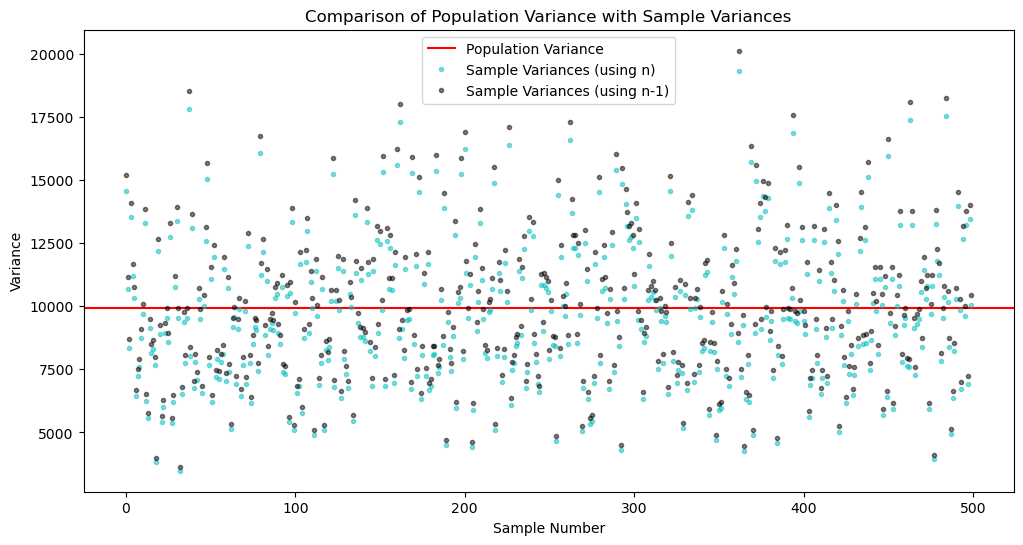

In [10]:
# Plotting
plt.figure(figsize=(12,6))
plt.axhline(y=population_variance, color='r', linestyle='-', label="Population Variance")
plt.plot(sample_variances_n, 'c.',         label="Sample Variances (using n)", alpha=0.5)
plt.plot(sample_variances_n_minus_1, 'k.', label="Sample Variances (using n-1)", alpha=0.5)
plt.xlabel("Sample Number")
plt.ylabel("Variance")
plt.title("Comparison of Population Variance with Sample Variances")
plt.legend();